## python notebook for data handling

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import gif

Plot the final state of a certain configuration and the whole gif with the routes of minimal lenght found through the algorithm execution:

In [80]:
nodes = np.genfromtxt("./nodes.csv", delimiter=",")
routes = np.genfromtxt("./routes.csv", delimiter=",", dtype=int)
min_energy = np.genfromtxt("./min_energy.txt", dtype=float)
accepted_energy = np.genfromtxt("./accepted_energy.txt", dtype=float)

#display(nodes)
#display(routes)
#display(min_energy)

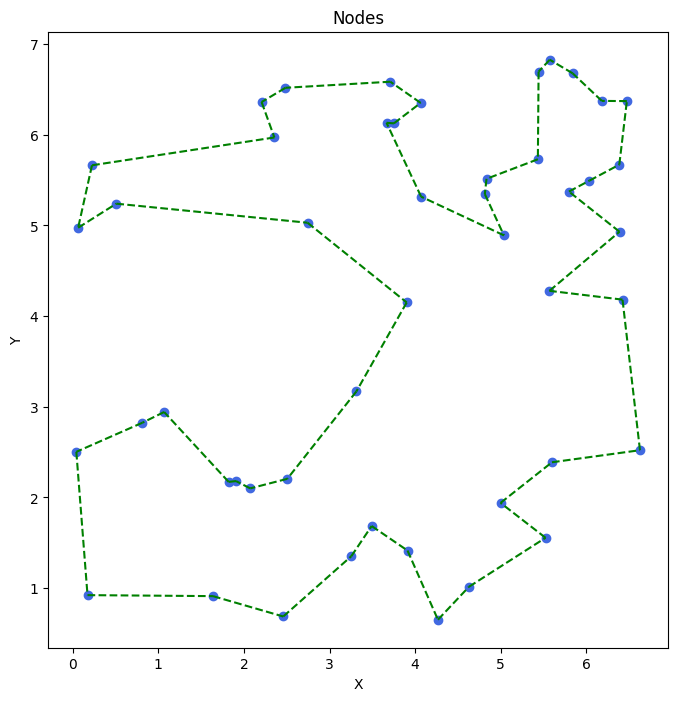

In [81]:
x_coords = [0] + [node[0] for node in nodes]
y_coords = [0] + [node[1] for node in nodes]
lr = len(routes) - 1
plt.figure(figsize=(8,8))
plt.scatter(x_coords[1:], y_coords[1:], color='royalblue')
plt.title('Nodes')
plt.xlabel('X')
plt.ylabel('Y')
for i in range(len(nodes)-1):
    plt.plot((x_coords[routes[lr][i]],x_coords[routes[lr][i+1]]), (y_coords[routes[lr][i]],y_coords[routes[lr][i+1]]), 'g--')
plt.plot((x_coords[routes[lr][len(nodes)-1]],x_coords[routes[lr][0]]), (y_coords[routes[lr][len(nodes)-1]],y_coords[routes[lr][0]]), 'g--')
plt.savefig('final_state_48_4.png')
plt.show()

In [82]:
# animate with the library 'gif':
@gif.frame
def plot(route):
    x_coords = [0] + [node[0] for node in nodes]
    y_coords = [0] + [node[1] for node in nodes]
    plt.figure(figsize=(8,8))
    plt.scatter(x_coords[1:], y_coords[1:], color='royalblue')
    plt.title('Nodes')
    plt.xlabel('X')
    plt.ylabel('Y')
    for i in range(len(nodes)-1):
        plt.plot((x_coords[routes[route][i]],x_coords[routes[route][i+1]]), (y_coords[routes[route][i]],y_coords[routes[route][i+1]]), 'g--')
    plt.plot((x_coords[routes[route][len(nodes)-1]],x_coords[routes[route][0]]), (y_coords[routes[route][len(nodes)-1]],y_coords[routes[route][0]]), 'g--')
# Construct "frames"
frames = [plot(route) for route in range(len(routes))]
# Save "frames" to gif with a specified duration (milliseconds) between each frame
gif.save(frames, 'example_48_4.gif', duration=60)

Plot the energy trend, both of the minimal energies and all the accepted routes' energies

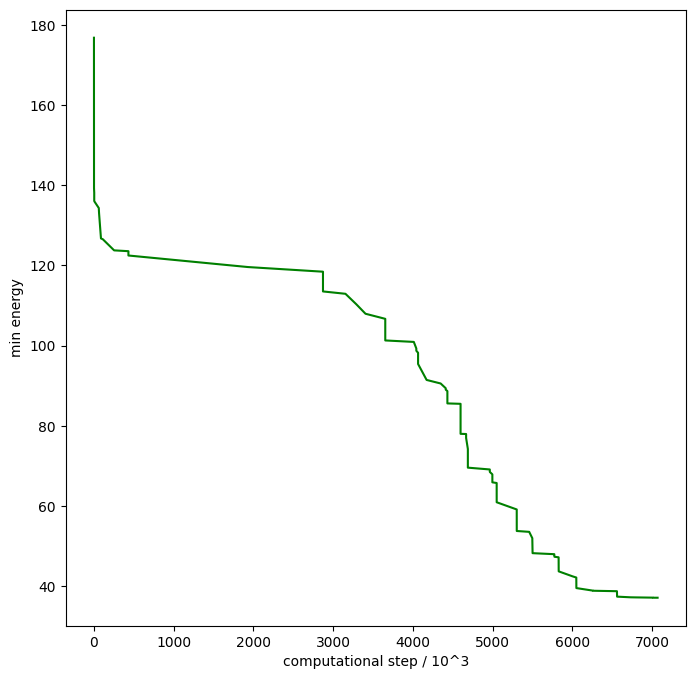

In [85]:
plt.figure(figsize=(8,8))
plt.xlabel('computational step / 10^3')
plt.ylabel('min energy')
plt.plot(min_energy[:,0]/1000, min_energy[:,1], 'g-')
plt.plot(accepted_energy[:,0]/1000, accepted_energy[:,1], 'b-')
plt.savefig('min_energy_48_4.png')
plt.show()

Create the histogram with the value of accepted energies for a certain configuration:

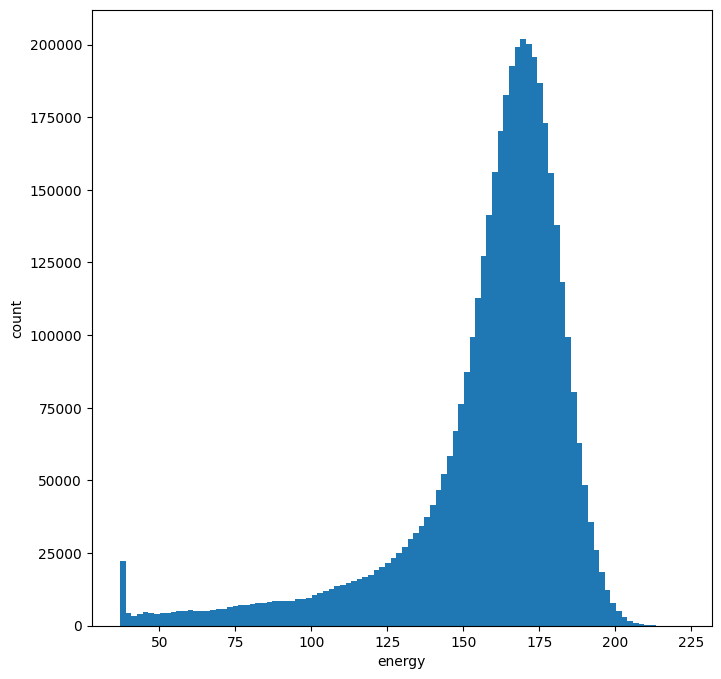

In [84]:
plt.figure(figsize=(8,8))
plt.xlabel('energy')
plt.ylabel('count')
#plt.plot(energy[:,0]/1000, energy[:,1], 'g-')
plt.hist(accepted_energy[:,1], bins=100)
#plt.hi(accepted_energy[:,0]/1000, accepted_energy[:,1], 'b-')
plt.savefig('energy_histogram_48_4.png')
plt.show()

CPU time analysis

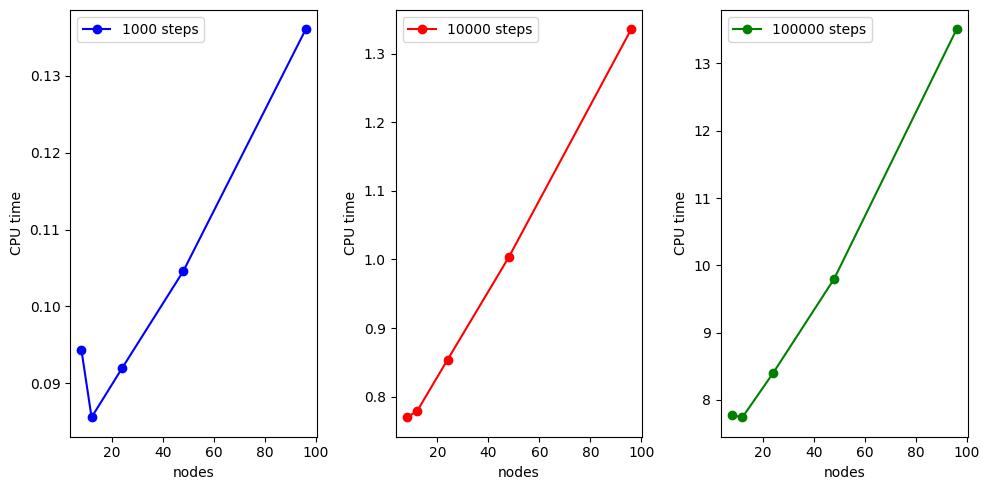

In [46]:
CPUtimes = np.genfromtxt("./CPUtimes_099.csv", delimiter=",", dtype=float)
#print(CPUtimes)
nodes = [8, 12, 24, 48, 96]
fig = plt.figure(figsize=(10,5))
plt.subplot(131)
plt.xlabel('nodes')
plt.ylabel('CPU time')
plt.plot(nodes, CPUtimes[0:5, 7], 'o-', color = 'b', label = '1000 steps')
plt.legend()
plt.subplot(132)
plt.xlabel('nodes')
plt.ylabel('CPU time')
plt.plot(nodes, CPUtimes[5:10, 7], 'o-', color = 'r', label = '10000 steps')
plt.legend()
plt.subplot(133)
plt.xlabel('nodes')
plt.ylabel('CPU time')
plt.plot(nodes, CPUtimes[10:15, 7], 'o-', color = 'g', label = '100000 steps')
plt.legend()
# removed extra white space
plt.tight_layout()
plt.savefig('CPUtimes_099.png')
plt.show()

improvement analysis

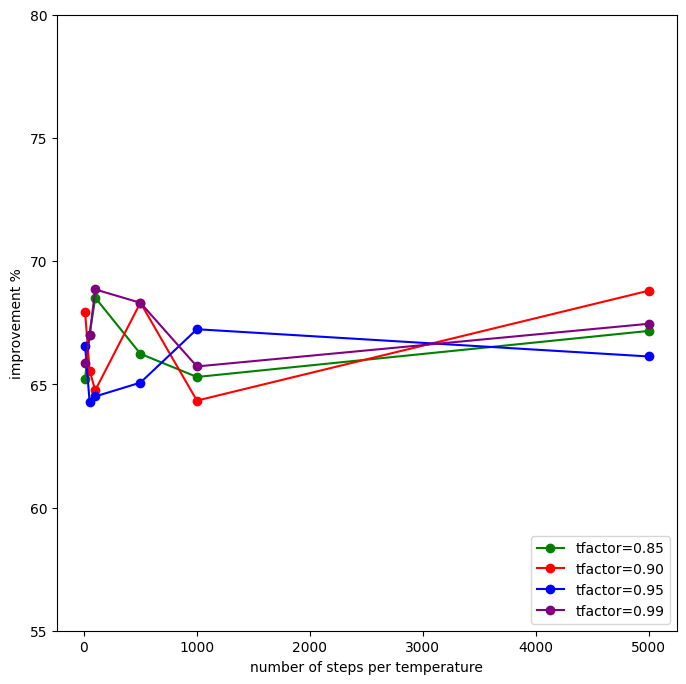

In [70]:
improvements = np.genfromtxt("./improvement_24.csv", delimiter=",", dtype=float)
#print(CPUtimes)
steps = [10, 50, 100, 500, 1000, 5000]
fig = plt.figure(figsize=(8,8))
plt.xlabel('number of steps per temperature')
plt.ylabel('improvement %')
plt.ylim([55,80])
plt.plot(steps, improvements[0:6, 7], 'o-', color = 'g', label = 'tfactor=0.85')
plt.plot(steps, improvements[6:12, 7], 'o-', color = 'r', label = 'tfactor=0.90')
plt.plot(steps, improvements[12:18, 7], 'o-', color = 'b', label = 'tfactor=0.95')
plt.plot(steps, improvements[18:24, 7], 'o-', color = 'purple', label = 'tfactor=0.99')
plt.legend(loc = 'lower right')
plt.savefig('improvements_24.png')
plt.show()